In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset using pandas
packages_df = pd.read_csv('../data/interim/interim_parsed_packages_df.csv', delimiter=',')
receptacle_df = pd.read_csv('../data/interim/interim_parsed_receptacle_df.csv', delimiter=',')

In [3]:
#see the percentage of missing values in each column
packages_df.isnull().mean() * 100

RECPTCL_FID                   0.0000
MAILITM_FID                   0.0000
date                          0.0000
etablissement_postal          2.6772
EVENT_TYPE_CD                 0.0000
next_etablissement_postal    58.8267
hour                          0.0000
day_of_week                   0.0000
service_indicator             0.0000
serial_number                 0.0000
country_code                  0.0000
origin_country                0.0000
destination_country           0.0000
origin_destination            0.0000
flow_type                     0.0000
processing_duration           0.0000
processing_duration_days      0.0000
num_etablissements            0.0000
dtype: float64

In [4]:
#drop rows with missing etablissement_postal since it has very few missing values
packages_df = packages_df.dropna(subset=['etablissement_postal'])

In [5]:
#drop unnecessary columns
packages_df = packages_df.drop(
    columns=['country_code', 'serial_number', 'RECPTCL_FID', 'MAILITM_FID', 'date', 'country_code',
             'processing_duration', 'origin_country', 'destination_country'])

In [6]:
packages_df.head()

,etablissement_postal,EVENT_TYPE_CD,next_etablissement_postal,hour,day_of_week,service_indicator,origin_destination,flow_type,processing_duration_days,num_etablissements
35,ETAB_0001,30,NaN,7,Monday,1A,FR_DZ,inbound,6.143074,2
36,ETAB_0002,32,NaN,7,Tuesday,1A,FR_DZ,inbound,6.143074,2
37,ETAB_0002,36,NaN,7,Tuesday,1A,FR_DZ,inbound,6.143074,2
38,ETAB_0002,39,NaN,7,Tuesday,1A,FR_DZ,inbound,6.143074,2
39,ETAB_0002,39,NaN,8,Tuesday,1A,FR_DZ,inbound,6.143074,2


In [7]:
#split data into train and test sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(packages_df, test_size=0.2, random_state=42)

In [8]:
#seperate features and target variable
X_train = train_df.drop('processing_duration_days', axis=1)
y_train = train_df['processing_duration_days']
X_test = test_df.drop('processing_duration_days', axis=1)
y_test = test_df['processing_duration_days']

In [9]:
#see the percentage of missing values in each column
X_train.isnull().mean() * 100

etablissement_postal          0.000000
EVENT_TYPE_CD                 0.000000
next_etablissement_postal    60.428959
hour                          0.000000
day_of_week                   0.000000
service_indicator             0.000000
origin_destination            0.000000
flow_type                     0.000000
num_etablissements            0.000000
dtype: float64

# investigate missing values in next_etablissement_postal

In [13]:
#we investigate the reason behind missing values in next_etablissement_postal
missing_next_postal = X_train[X_train['next_etablissement_postal'].isnull()]
missing_next_postal.shape

(470489, 9)

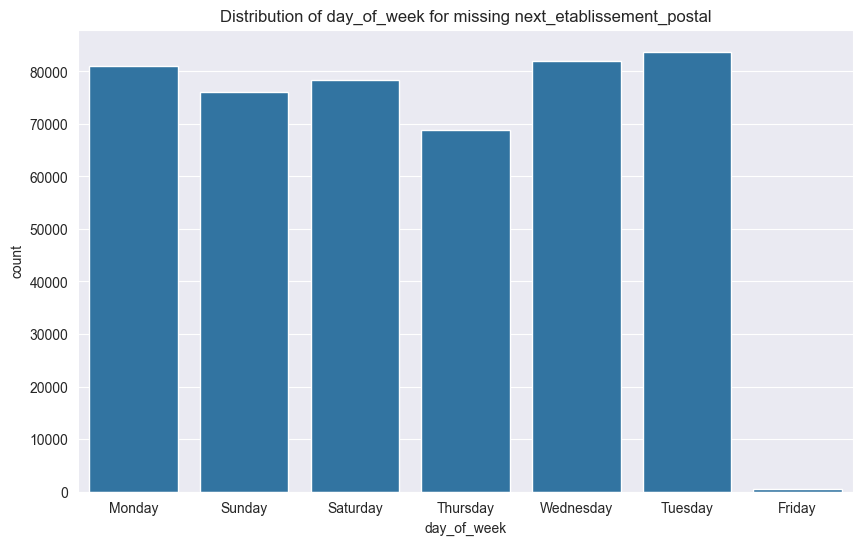

In [36]:
#see if there is a relation with day_of_week column
#visualize the distribution of day_of_week for missing next_etablissement_postal
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=missing_next_postal)
plt.title('Distribution of day_of_week for missing next_etablissement_postal')
plt.show()

all days seem to have the same distribution, so we cannot conclude anything from this

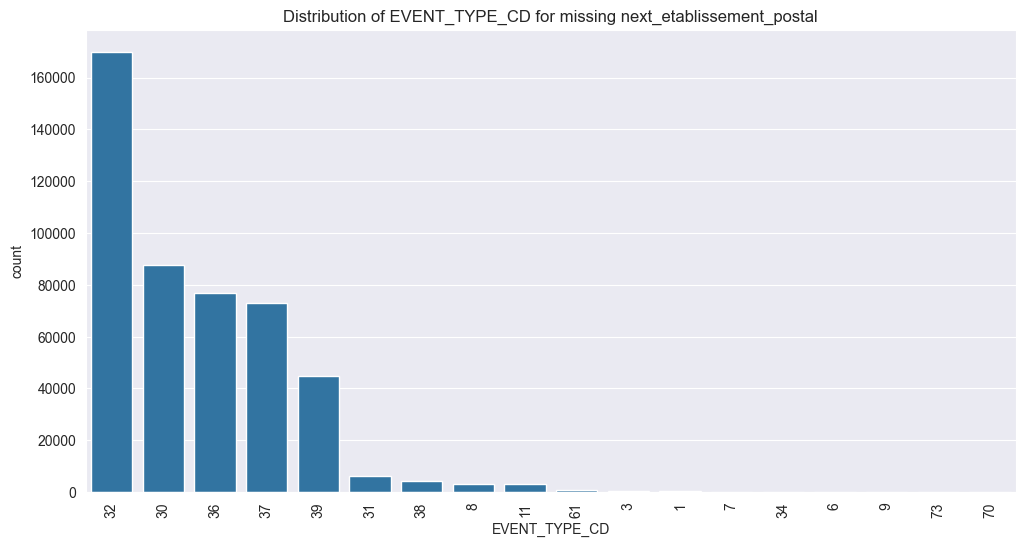

In [30]:
#see if EVENT_TYPE_CD has any relation with missing next_etablissement_postal
plt.figure(figsize=(12, 6))
sns.countplot(x='EVENT_TYPE_CD', data=missing_next_postal,
              order=missing_next_postal['EVENT_TYPE_CD'].value_counts().index)
plt.title('Distribution of EVENT_TYPE_CD for missing next_etablissement_postal')
plt.xticks(rotation=90)
plt.show()

we calculate the percentage of null values explained by the top 5 highest contributing EVENT_TYPE_CD
to the null values in next_etablissement_postal

In [34]:
top_5_event_types = missing_next_postal['EVENT_TYPE_CD'].value_counts().head(5)
top_5_percentage = (top_5_event_types.sum() / missing_next_postal.shape[0]) * 100
top_5_percentage

np.float64(96.07812297418218)

we find that the top 5 EVENT_TYPE_CD contribute to around 96% of the missing values in next_etablissement_postal

we see if origin_destination has any relation with missing next_etablissement_postal

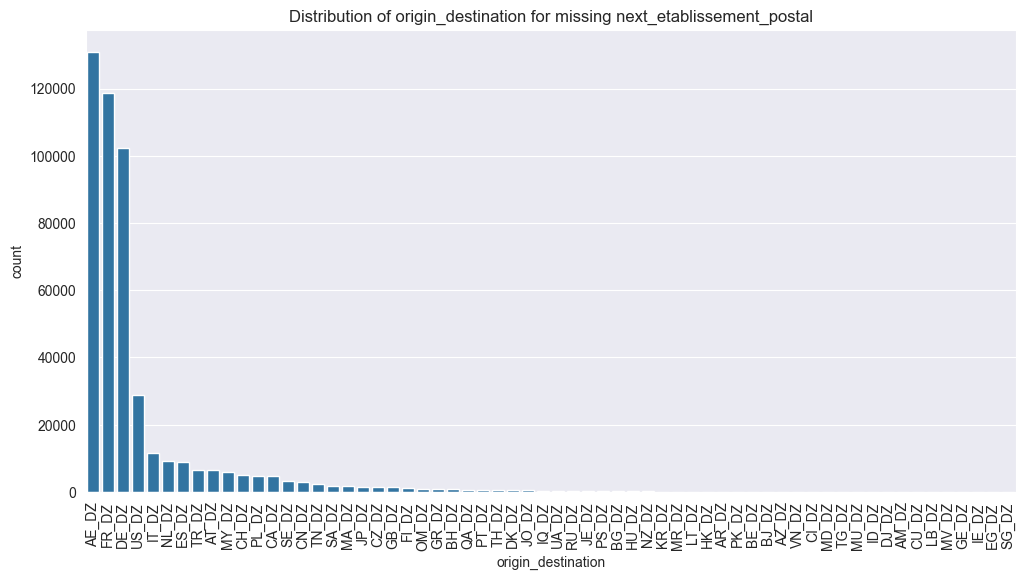

In [37]:
#see if origin_destination has any relation with missing next_etablissement_postal
plt.figure(figsize=(12, 6))
sns.countplot(x='origin_destination', data=missing_next_postal,
              order=missing_next_postal['origin_destination'].value_counts().index)
plt.title('Distribution of origin_destination for missing next_etablissement_postal')
plt.xticks(rotation=90)
plt.show()

In [44]:
top_5_origin_destination = missing_next_postal['origin_destination'].value_counts().head(5)
top_5_percentage_origin_destination = (top_5_origin_destination.sum() / missing_next_postal.shape[0]) * 100
top_5_percentage_origin_destination

np.float64(83.40556314812886)

the top 5 origin_destination contribute to around 83% of the missing values in next_etablissement_postal

investigate if service_indicator has any relation with missing next_etablissement_postal

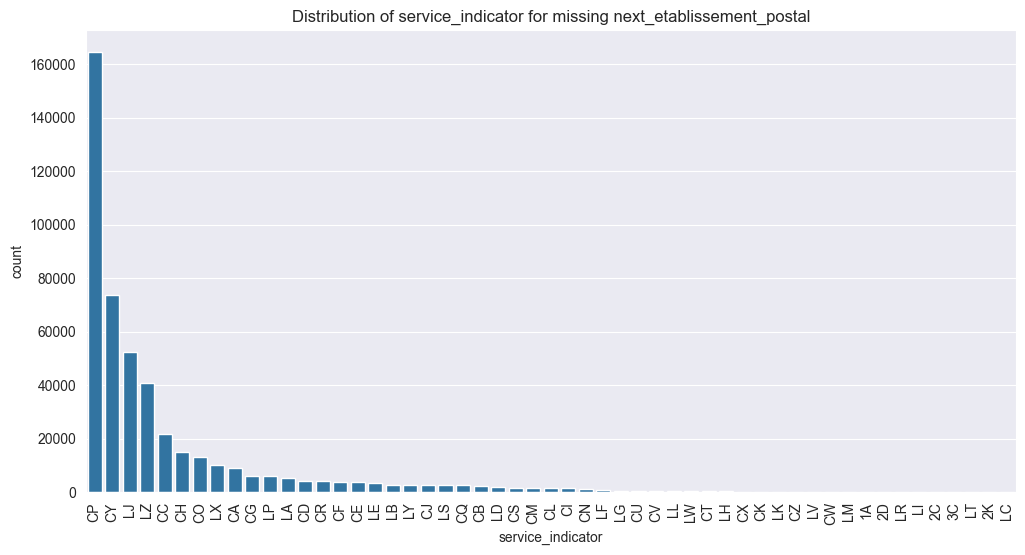

In [45]:
#see if service_indicator has any relation with missing next_etablissement_postal
plt.figure(figsize=(12, 6))
sns.countplot(x='service_indicator', data=missing_next_postal,
              order=missing_next_postal['service_indicator'].value_counts().index)
plt.title('Distribution of service_indicator for missing next_etablissement_postal')
plt.xticks(rotation=90)
plt.show()

it seems that service_indicator has a strong effect on missing next_etablissement_postal

we find that EVENT_TYPE_CD, origin_destination and service_indicator have strong relation with missing next_etablissement_postal,certain values for these columns contribute to most of the missing values in next_etablissement_postal

# further domains specific investigation to find the reason behind missing next_etablissement_postal, for now we will keep the missing values as is

# handle categorical features

In [51]:
#see the type of features
X_train.dtypes


etablissement_postal         object
EVENT_TYPE_CD                 int64
next_etablissement_postal    object
hour                          int64
day_of_week                  object
service_indicator            object
origin_destination           object
flow_type                    object
num_etablissements            int64
dtype: object

In [54]:
categorical_features = ['etablissement_postal', 'next_etablissement_postal', 'EVENT_TYPE_CD',
                        'origin_destination', 'service_indicator', 'day_of_week','flow_type']
X_train[categorical_features].nunique()

etablissement_postal         2815
next_etablissement_postal    2625
EVENT_TYPE_CD                  23
origin_destination             64
service_indicator              57
day_of_week                     7
flow_type                       1
dtype: int64

we notice that some categorical features have high cardinality, using categorical encoding techniques like one hot encoding will lead to very high dimensional data